In [208]:
import numpy as np
from datascience import *
import math as m
import qgrid as q
import pandas as pd
from scipy.stats import chi2_contingency
import re

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Setting up Tables

In [242]:
original_data = pd.read_csv("community_RR_csv.csv")
original_data_caninervis = original_data[original_data["Syntrichia caninervis cover"] != "0%"][['Coordinates', 'Exposure of S. caninervis', 'Sex (M,F,S)']].rename({'Sex (M,F,S)':'Phenotypic Sex'}, axis=1)
original_data_caninervis

,Coordinates,Exposure of S. caninervis,Phenotypic Sex
1,T1 30,I,S
2,T1 30,I,S
3,T1 30,I,S
4,T1 30,I,S
5,T1 30,I,S
6,T1 30,I,F
7,T1 30,I,S
8,T1 30,I,S
9,T1 30,I,S
10,T1 30,I,S


In [210]:
our_data_unclean = pd.read_csv("sex_ratio_data_final.csv")
our_data_unclean.head()

,Genomics_ID,Sample_ID,loc,lat,lon,Species,Expressed Sex,Collector,Collection Year,Extraction #,PCR #,DIGEST #,Inferred Genetic Sex,NOTES,Gel Date,Lab,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,GJB341,BOWKER-T1-30,NaN,NaN,NaN,S. caninervis,U,M. Bowker,1997.0,17.0,39,24.0,F,NaN,NaN,Mishler,NaN,NaN,NaN
1,GJB342,BOWKER-T1-30,NaN,NaN,NaN,S. caninervis,U,M. Bowker,1997.0,17.0,39,24.0,F,NaN,NaN,Mishler,NaN,NaN,NaN
2,GJB343,BOWKER-T1-30,NaN,NaN,NaN,S. caninervis,U,M. Bowker,1997.0,17.0,39,24.0,F,NaN,NaN,Mishler,NaN,NaN,NaN
3,GJB344,BOWKER-T1-30,NaN,NaN,NaN,S. caninervis,U,M. Bowker,1997.0,17.0,39,24.0,F,NaN,NaN,Mishler,NaN,count F,257.0
4,GJB345,BOWKER-T1-30,NaN,NaN,NaN,S. caninervis,U,M. Bowker,1997.0,17.0,39,24.0,F,NaN,NaN,Mishler,NaN,count M,14.0


In [211]:
our_data_pre = our_data_unclean[["Sample_ID","Inferred Genetic Sex"]]
our_data = our_data_pre[~our_data_pre['Inferred Genetic Sex'].isna()].reset_index().drop('index', axis=1)
our_data.head()

,Sample_ID,Inferred Genetic Sex
0,BOWKER-T1-30,F
1,BOWKER-T1-30,F
2,BOWKER-T1-30,F
3,BOWKER-T1-30,F
4,BOWKER-T1-30,F


In [243]:
search = []    
for values in our_data['Sample_ID']:
    search.append(re.search(r'T[^.]*', values).group())

coordinates = pd.DataFrame(pd.Series(search).str.replace('-',' '))  

our_data['Coordinates'] = coordinates[0]
our_data[our_data["Coordinates"] == "T2 105"]

,Sample_ID,Inferred Genetic Sex,Coordinates
131,BOWKER-T2-105.5,F,T2 105
132,BOWKER-T2-105.6,F,T2 105
133,BOWKER-T2-105.8,F,T2 105
134,BOWKER-T2-105.9,F,T2 105
135,BOWKER-T2-105.10,M,T2 105


In [213]:
pre_gen = our_data.drop('Sample_ID', axis=1).set_index('Coordinates')
gen = pd.get_dummies(pre_gen).groupby('Coordinates').sum()
gen.head()

,Inferred Genetic Sex_F,Inferred Genetic Sex_M
Coordinates,,
T1 105,10,0
T1 135,10,0
T1 150,7,0
T1 165,7,0
T1 180,9,0


In [249]:
dumb = pd.get_dummies(original_data_caninervis[['Coordinates','Phenotypic Sex']].set_index('Coordinates'))
pre_phen = dumb.groupby('Coordinates').sum()
phen = pre_phen.join(original_data_caninervis.groupby('Coordinates').first()[['Exposure of S. caninervis']])
dumb.reset_index()[dumb.reset_index()["Coordinates"] == "T2 105"]

,Coordinates,Phenotypic Sex_F,Phenotypic Sex_M,Phenotypic Sex_S


In [215]:
df = gen.join(phen).rename({"Exposure of S. caninervis":"Exposure"}, axis=1)
df.head()#.append(df.sum().rename('Total')).assign(Total=lambda d: d.sum(1))

,Inferred Genetic Sex_F,Inferred Genetic Sex_M,Phenotypic Sex_F,Phenotypic Sex_M,Phenotypic Sex_S,Exposure
Coordinates,,,,,,
T1 105,10,0,1.0,0.0,9.0,I
T1 135,10,0,0.0,0.0,10.0,I
T1 150,7,0,0.0,0.0,10.0,I
T1 165,7,0,0.0,0.0,10.0,I
T1 180,9,0,0.0,0.0,10.0,I


# Question Answering

In [216]:
df["Successful PCRs"] = df["Inferred Genetic Sex_F"] + df["Inferred Genetic Sex_M"]
np.average(df["Successful PCRs"])

6.609756097560975

In [217]:
print("# of Ramets successfully genotyped is " + str(sum(df['Successful PCRs'].dropna())))

# of Ramets successfully genotyped is 271


In [218]:
print("# of Ramets by exposure:  WARNING - NaN values of exposure; lose 15 samples")
exposure = df.dropna().groupby('Exposure').sum()[['Phenotypic Sex_M','Phenotypic Sex_F','Inferred Genetic Sex_M','Inferred Genetic Sex_F','Successful PCRs']]
exposure.append(exposure.sum().rename('Total')).assign(Total=lambda d: d.sum(1))

# of Ramets by exposure:  WARNING - NaN values of exposure; lose 15 samples


,Phenotypic Sex_M,Phenotypic Sex_F,Inferred Genetic Sex_M,Inferred Genetic Sex_F,Successful PCRs,Total
Exposure,,,,,,
I,5.0,23.0,5.0,138.0,143.0,314.0
O,0.0,2.0,6.0,75.0,81.0,164.0
U,1.0,4.0,2.0,30.0,32.0,69.0
Total,6.0,29.0,13.0,243.0,256.0,547.0


In [219]:
df[df['Exposure'].isna()]

,Inferred Genetic Sex_F,Inferred Genetic Sex_M,Phenotypic Sex_F,Phenotypic Sex_M,Phenotypic Sex_S,Exposure,Successful PCRs
Coordinates,,,,,,,
T2 105,4,1,NaN,NaN,NaN,NaN,5
T3 135,10,0,3.0,0.0,7.0,NaN,10


In [220]:
phen_exposure = df.dropna().groupby('Exposure').sum()[['Phenotypic Sex_F','Phenotypic Sex_M']]
phen_exposure.append(phen_exposure.sum().rename('Total')).assign(Total=lambda d: d.sum(1))

,Phenotypic Sex_F,Phenotypic Sex_M,Total
Exposure,,,
I,23.0,5.0,28.0
O,2.0,0.0,2.0
U,4.0,1.0,5.0
Total,29.0,6.0,35.0


In [221]:
gen_exposure = df.dropna().groupby('Exposure').sum()[['Inferred Genetic Sex_F', 'Inferred Genetic Sex_M']]
gen_exposure.append(gen_exposure.sum().rename('Total')).assign(Total=lambda d: d.sum(1))

,Inferred Genetic Sex_F,Inferred Genetic Sex_M,Total
Exposure,,,
I,138,5,143
O,75,6,81
U,30,2,32
Total,243,13,256


In [222]:
phen_ratio = str(sum(df["Phenotypic Sex_F"].dropna())) + ":" + str(sum(df["Phenotypic Sex_M"].dropna()))
gen_ratio = str(sum(df["Inferred Genetic Sex_F"].dropna())) + ":" + str(sum(df["Inferred Genetic Sex_M"].dropna()))
print("Phenotypic sex ratio (F/M): " + phen_ratio)
print("Genotypic sex ratio (F/M): " + gen_ratio)

Phenotypic sex ratio (F/M): 32.0:6.0
Genotypic sex ratio (F/M): 257:14


In [223]:
int(re.split(r'T| ', 'T1 30')[1]) * 100 + int(re.split(r'T| ', 'T1 30')[2])

130

# Pie Grid Chart

In [252]:
fix=pd.read_csv('pie_fix.csv')
fixed=fix.drop(["Inferred Genetic Sex_F","Inferred Genetic Sex_M"], axis=1)
df=df.set_index("Coordinates").join(fixed.set_index("Coordinates")).drop(["level_0", "index"],axis=1)

In [270]:
df.at["T2 105", "Phenotypic Sex_F"] = 0
df.at["T2 105", "Phenotypic Sex_M"] = 0
df.at["T2 105", "Phenotypic Sex_S"] = 10
df.at["T2 105", "Exposure"] = "O"
df

,Inferred Genetic Sex_F,Inferred Genetic Sex_M,Phenotypic Sex_F,Phenotypic Sex_M,Phenotypic Sex_S,Exposure,Successful PCRs,indexNumber,Row,Column
Coordinates,,,,,,,,,,
T1 105,10,0,1.0,0.0,9.0,I,10,1105,1,105
T1 135,10,0,0.0,0.0,10.0,I,10,1135,1,135
T1 150,7,0,0.0,0.0,10.0,I,7,1150,1,150
T1 165,7,0,0.0,0.0,10.0,I,7,1165,1,165
T1 180,9,0,0.0,0.0,10.0,I,9,1180,1,180
T1 195,10,0,0.0,0.0,10.0,I,10,1195,1,195
T1 210,4,0,0.0,0.0,10.0,I,4,1210,1,210
T1 240,10,0,4.0,0.0,6.0,I,10,1240,1,240
T1 30,10,0,1.0,0.0,9.0,I,10,1030,1,30


In [269]:
good = df.drop(["Inferred Genetic Sex_F","Inferred Genetic Sex_M"], axis=1)
bad = df[["Inferred Genetic Sex_F","Inferred Genetic Sex_M"]]
pie_data = pd.melt(bad.reset_index(), id_vars="Coordinates").join(good.set_index("Coordinates")).sort_values("indexNumber")
pie_data["Sex"] = pie_data["variable"].str[-1:]
pie_final = pie_data.drop("variable", axis=1).rename({"value":"Count"}, axis=1)
pie_final.head()

KeyError: 'Coordinates'

In [206]:
pie_final.to_excel("pie_final.xlsx")

# Chi2 Contigency

In [84]:
from scipy.stats import chi2_contingency

In [85]:
chi2_contingency(np.array(gen_exposure))

(1.7449996101468084,
 0.4179055599686734,
 2,
 array([[135.73828125,   7.26171875],
        [ 76.88671875,   4.11328125],
        [ 30.375     ,   1.625     ]]))

In [86]:
chi2_contingency(np.array(phen_exposure))

(0.45258620689655177, 0.7974843220018104, 2, array([[23.2       ,  4.8       ],
        [ 1.65714286,  0.34285714],
        [ 4.14285714,  0.85714286]]))

In [87]:
exposure2 = df.dropna().groupby('Exposure').sum()[['Phenotypic Sex_M','Phenotypic Sex_F','Phenotypic Sex_S']]
exposure2['Expressing Sex'] = exposure2['Phenotypic Sex_M'] + exposure2['Phenotypic Sex_F']
exposure2['Not Expressing Sex'] = exposure2['Phenotypic Sex_S']

chi2_contingency(np.array(exposure2[['Expressing Sex','Not Expressing Sex']]))

KeyError: 'Exposure'

In [ ]:
#end chi2

In [272]:
melt=df[['Phenotypic Sex_F','Phenotypic Sex_M','Phenotypic Sex_S']]#,'Inferred Genetic Sex_F','Inferred Genetic Sex_M']]


phenotypic_count = original_data_caninervis[['Coordinates','Phenotypic Sex']].rename({'Coordinates':'Phenotypic Count', 'Phenotypic Sex':'Sex'}, axis=1).groupby('Sex').count().astype(int)
phenotypic_count.append(phenotypic_count.sum().rename('Total')).assign(Total=lambda d: d.sum(1))


,Phenotypic Count,Total
Sex,,
F,128,128
M,9,9
S,753,753
Total,890,890


In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
genotypic_count = pre_gen.reset_index().rename({'Coordinates':'Genotypic Count', 'Inferred Genetic Sex':'Sex'}, axis=1).groupby('Sex').count().astype(int)
pub_ready = phenotypic_count.join(genotypic_count)
print("*Counting expression over lifetime")
pub = pub_ready.append(pub_ready.sum().rename('Total')).assign(Total=lambda d: d.sum(1)).fillna(0)
pub


In [ ]:
pub['Phenotypic Count %'] = ((round((pub['Phenotypic Count'] / pub.loc['Total','Phenotypic Count']) * 100, 0))) 
pub['Genotypic Count %'] = ((round((pub['Genotypic Count'] / pub.loc['Total','Genotypic Count']) * 100, 0)))
pub['Phenotypic Count %'] = pd.Series(["{0:.0f}%".format(val) for val in pub['Phenotypic Count %']], index = pub.index)
pub['Genotypic Count %'] = pd.Series(["{0:.0f}%".format(val) for val in pub['Genotypic Count %']], index = pub.index)

pub


In [ ]:
pop = df[['Inferred Genetic Sex_F','Inferred Genetic Sex_M']]
description = []
for index, row in pop.iterrows():
    if row['Inferred Genetic Sex_F'] == 0 and row['Inferred Genetic Sex_M'] > 0:
        description += ['Entirely Male']
        print(index)
    elif row['Inferred Genetic Sex_F'] > 0 and row['Inferred Genetic Sex_M'] == 0:
        description += ['Entirely Female']
    else:
        description += ['Mixed']

In [ ]:
pop

In [ ]:
pop['Description'] = np.array(description)
pop.groupby('Description').count()[['Inferred Genetic Sex_F']].rename({'Inferred Genetic Sex_F':'Population Genetic Sex Ratio'}, axis=1)

In [ ]:
pop = df[['Phenotypic Sex_F','Phenotypic Sex_M']]
description = []
for index, row in pop.iterrows():
    if row['Phenotypic Sex_F'] == 0 and row['Phenotypic Sex_M'] > 0:
        description += ['Entirely Male']
    elif row['Phenotypic Sex_F'] > 0 and row['Phenotypic Sex_M'] == 0:
        description += ['Entirely Female']
    else:
        description += ['Mixed']
pop['Description'] = np.array(description)
pop.groupby('Description').count()[['Phenotypic Sex_F']].rename({'Phenotypic Sex_F':'Population Phenotypic Sex Ratio'}, axis=1)


In [ ]:
pop = df[df['Phenotypic Sex_S'] == 10][['Inferred Genetic Sex_F','Inferred Genetic Sex_M']]
description = []
for index, row in pop.iterrows():
    if row['Inferred Genetic Sex_F'] == 0 and row['Inferred Genetic Sex_M'] > 0:
        description += ['Entirely Male']
    elif row['Inferred Genetic Sex_F'] > 0 and row['Inferred Genetic Sex_M'] == 0:
        description += ['Entirely Female']
    else:
        description += ['Mixed']
pop['Description'] = np.array(description)
pop.groupby('Description').count()[['Inferred Genetic Sex_F']].rename({'Inferred Genetic Sex_F':'Population Genetic Sex Ratio'}, axis=1)


# Tables for Jenna

In [494]:
df = df.dropna()
df

,Inferred Genetic Sex_F,Inferred Genetic Sex_M,Phenotypic Sex_F,Phenotypic Sex_M,Phenotypic Sex_S,Exposure,Successful PCRs,Row,Column
indexNumber,,,,,,,,,
1105,10,0,1.0,0.0,9.0,I,10,1,105
1135,10,0,0.0,0.0,10.0,I,10,1,135
1150,7,0,0.0,0.0,10.0,I,7,1,150
1165,7,0,0.0,0.0,10.0,I,7,1,165
1180,9,0,0.0,0.0,10.0,I,9,1,180
1195,10,0,0.0,0.0,10.0,I,10,1,195
1210,4,0,0.0,0.0,10.0,I,4,1,210
1240,10,0,4.0,0.0,6.0,I,10,1,240
1030,10,0,1.0,0.0,9.0,I,10,1,30


In [495]:
exposure = df.groupby('Exposure').sum()[['Inferred Genetic Sex_F','Inferred Genetic Sex_M','Phenotypic Sex_F','Phenotypic Sex_M','Phenotypic Sex_S']]
exposure

,Inferred Genetic Sex_F,Inferred Genetic Sex_M,Phenotypic Sex_F,Phenotypic Sex_M,Phenotypic Sex_S
Exposure,,,,,
I,138,5,23.0,5.0,192.0
O,79,7,2.0,0.0,128.0
U,30,2,4.0,1.0,45.0


In [496]:
melted = pd.melt(exposure.reset_index(), id_vars=['Exposure'])
melted

,Exposure,variable,value
0,I,Inferred Genetic Sex_F,138.0
1,O,Inferred Genetic Sex_F,79.0
2,U,Inferred Genetic Sex_F,30.0
3,I,Inferred Genetic Sex_M,5.0
4,O,Inferred Genetic Sex_M,7.0
5,U,Inferred Genetic Sex_M,2.0
6,I,Phenotypic Sex_F,23.0
7,O,Phenotypic Sex_F,2.0
8,U,Phenotypic Sex_F,4.0
9,I,Phenotypic Sex_M,5.0


In [521]:
melted['Sex'] = melted['variable'].str[-1:]
melted['Genetic?'] = melted['variable'].str[0:1] == 'I'
analysis = melted.drop('variable', axis=1).rename({"Sex":"Sex","Exposure":"Exposure","Expressing Sex":"Expressing Sex","value":"Count"}, axis=1)
analysis = analysis[["Sex","Exposure","Genetic?","Count"]]
analysis.sort_values("Sex")


,Sex,Exposure,Genetic?,Count
0,F,I,True,138.0
1,F,O,True,79.0
2,F,U,True,30.0
6,F,I,False,23.0
7,F,O,False,2.0
8,F,U,False,4.0
3,M,I,True,5.0
4,M,O,True,7.0
5,M,U,True,2.0
9,M,I,False,5.0


In [500]:
#Table 1. Counts of phenotypic and genotypic females, males, and non-expressing ramets.
template = analysis.groupby(["Sex", "Expressing Sex"]).sum().reset_index()
grouped = template.groupby("Sex").agg(list)
grouped["Genotypic Count"] = list(template[template['Expressing Sex'] == True]['Count']) + [0]
grouped["Phenotypic Count"] = list(template[template['Expressing Sex'] == False]['Count'])
grouped_template = grouped[["Genotypic Count","Phenotypic Count"]]
grouped_template = grouped_template.append(grouped_template.sum().rename('Total')).assign(Total=lambda d: d.sum(1))
grouped_template['Genotypic Count %'] = 100 * grouped_template["Genotypic Count"]/261
grouped_template['Phenotypic Count %'] = 100 * grouped_template["Phenotypic Count"]/400
grouped_template['Total %'] = 100 * grouped_template["Total"]/661
grouped_template.to_csv("table1.csv")


In [501]:
chi2_contingency(grouped.loc[["F","M"],["Genotypic Count","Phenotypic Count"]])

(5.055219691741432,
 0.024551869252984537,
 1,
 array([[243.36486486,  32.63513514],
        [ 17.63513514,   2.36486486]]))

In [502]:
#Table 2. Genotypic sex of non-expressing ramets in entirely non-expressing populations.
df_2 = df[df["Phenotypic Sex_S"] == 10].dropna()
entirely_female = sum(df_2[df_2["Inferred Genetic Sex_M"] == 0]["Inferred Genetic Sex_F"])
entirely_male = sum(df_2[df_2["Inferred Genetic Sex_F"] == 0]["Inferred Genetic Sex_M"])
mixed_df_2 = df_2[(df_2["Inferred Genetic Sex_F"] != 0) & (df_2["Inferred Genetic Sex_M"] != 0)]
mixed = sum(mixed_df_2["Inferred Genetic Sex_F"] + mixed_df_2["Inferred Genetic Sex_M"])
ls_2 = np.array([entirely_female, entirely_male, mixed]).astype(int)
ls_2

array([151,   0,  18])

In [503]:
#Table 3. Genotypic sex of non-expressing ramets in populations that contain only phenotypic females and non-expressing ramets.
no_phen_males = df[df["Phenotypic Sex_M"] == 0][['Inferred Genetic Sex_F','Inferred Genetic Sex_M', "Exposure"]].dropna()
entirely_female_npm = sum(no_phen_males[no_phen_males["Inferred Genetic Sex_M"] == 0]["Inferred Genetic Sex_F"])
entirely_male_npm = sum(no_phen_males[no_phen_males["Inferred Genetic Sex_F"] == 0]["Inferred Genetic Sex_M"])
mixed_no_phen_males = no_phen_males[(no_phen_males["Inferred Genetic Sex_F"] != 0) & (no_phen_males["Inferred Genetic Sex_M"] != 0)]
mixed_npm = sum(mixed_no_phen_males["Inferred Genetic Sex_F"] + mixed_no_phen_males["Inferred Genetic Sex_M"])
ls_3 = [entirely_female_npm, entirely_male_npm, mixed_npm]
ls_3

[233, 3, 18]

In [504]:
#Table 4. Genotypic sex of non-expressing ramets in populations that contain only phenotypic males and non-expressing ramets.
no_phen_females = df[df["Phenotypic Sex_F"] == 0][['Inferred Genetic Sex_F','Inferred Genetic Sex_M', "Exposure"]].dropna()
entirely_female_npf = sum(no_phen_females[no_phen_females["Inferred Genetic Sex_M"] == 0]["Inferred Genetic Sex_F"])
entirely_male_npf = sum(no_phen_females[no_phen_females["Inferred Genetic Sex_F"] == 0]["Inferred Genetic Sex_M"])
mixed_no_phen_females = no_phen_females[(no_phen_females["Inferred Genetic Sex_F"] != 0) & (no_phen_females["Inferred Genetic Sex_M"] != 0)]
mixed_npf = sum(mixed_no_phen_females["Inferred Genetic Sex_F"] + mixed_no_phen_females["Inferred Genetic Sex_M"])
ls_4 = [entirely_female_npf, entirely_male_npf, mixed_npf]
ls_4


[151, 2, 23]

In [505]:
p_values = pd.DataFrame({"Population Sex":["Entirely female", "Entirely male", "Mixed"],"Table_2":ls_2, "Table_3":ls_3, "Table_4":ls_4}).set_index("Population Sex")
p_pivot = pd.pivot_table(p_values, values=['Table_2', 'Table_3', 'Table_4'], index=["Population Sex"])


In [508]:
#Table 5 Female
chi2_contingency([
    [23, 138],
    [2,79],
    [4,30]
])

(8.067273295841673,
 0.017709808365847558,
 2,
 array([[ 16.91666667, 144.08333333],
        [  8.51086957,  72.48913043],
        [  3.57246377,  30.42753623]]))

In [509]:
#Table 5 Male
chi2_contingency([
    [5,5],
    [0,7],
    [1,2]
])

(4.92063492063492, 0.08540783306532157, 2, array([[3. , 7. ],
        [2.1, 4.9],
        [0.9, 2.1]]))

In [510]:
#Table 5 Total
chi2_contingency([
    [143,28],
    [81,2],
    [32,5]
])

(10.38704872451603,
 0.005552403609090629,
 2,
 array([[150.43298969,  20.56701031],
        [ 73.01718213,   9.98281787],
        [ 32.54982818,   4.45017182]]))

In [513]:
analysis

,Sex,Exposure,Expressing Sex,Count
0,F,I,True,138.0
1,F,O,True,79.0
2,F,U,True,30.0
3,M,I,True,5.0
4,M,O,True,7.0
5,M,U,True,2.0
6,F,I,False,23.0
7,F,O,False,2.0
8,F,U,False,4.0
9,M,I,False,5.0


In [483]:
pivot=pd.pivot_table(analysis, values='Count', index=["Sex","Exposure","Expressing Sex"])
pivot

Count
Sex Exposure Expressing Sex       
F   I        False            23.0
             True            138.0
    O        False             2.0
             True             79.0
    U        False             4.0
             True             30.0
M   I        False             5.0
             True              5.0
    O        False             0.0
             True              7.0
    U        False             1.0
             True              2.0
S   I        False           192.0
    O        False           128.0
    U        False            45.0

In [511]:
pivot.xs("F")

Count
Exposure Expressing Sex       
I        False            23.0
         True            138.0
O        False             2.0
         True             79.0
U        False             4.0
         True             30.0

In [514]:
versus_exposure =pd.pivot_table(analysis, values='Count', columns =["Exposure"], index=["Sex","Expressing Sex"])
versus_exposure


Exposure                I      O     U
Sex Expressing Sex                    
F   False            23.0    2.0   4.0
    True            138.0   79.0  30.0
M   False             5.0    0.0   1.0
    True              5.0    7.0   2.0
S   False           192.0  128.0  45.0

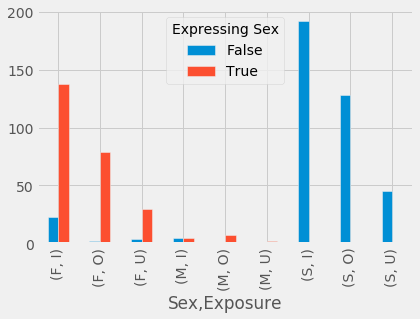

In [515]:
versus_expressed =pd.pivot_table(analysis, values='Count', columns =["Expressing Sex"], index=["Sex","Exposure"])
versus_expressed.plot(kind='bar')

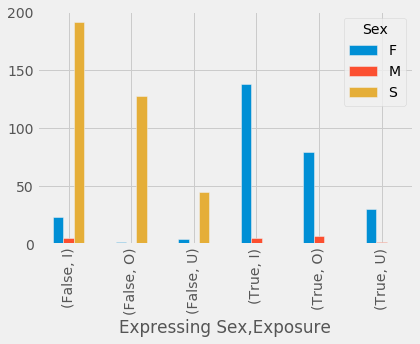

In [516]:
versus_sex =pd.pivot_table(analysis, values='Count', columns =["Sex"], index=["Expressing Sex","Exposure"])
versus_sex.plot(kind='bar')

In [517]:
# Sex and Expressed Sex vs. Exposure
chi2_contingency(versus_exposure)

(15.368896353071547,
 0.05235714012323228,
 8,
 array([[ 15.92586989,   9.47655068,   3.59757943],
        [135.64447806,  80.71406959,  30.64145234],
        [  3.29500756,   1.96066566,   0.74432678],
        [  7.68835098,   4.57488654,   1.73676248],
        [200.44629349, 119.27382753,  45.27987897]]))

In [518]:
# Sex and Exposure vs. Expressed Sex
chi2_contingency(versus_expressed)
versus_expressed

Expressing Sex  False  True 
Sex Exposure                
F   I            23.0  138.0
    O             2.0   79.0
    U             4.0   30.0
M   I             5.0    5.0
    O             0.0    7.0
    U             1.0    2.0
S   I           192.0    NaN
    O           128.0    NaN
    U            45.0    NaN

In [519]:
# Sex and Exposure vs. Expressed Sex
chi2_contingency(versus_sex)

(nan, nan, 10, array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]))

In [300]:
expression_melt = melted.drop(["Exposure", "variable"], axis=1).groupby(["Sex","Expressing Sex"]).sum()
expression_melt

value
Sex Expressing Sex       
F   False            29.0
    True            247.0
M   False             6.0
    True             14.0
S   False           365.0

In [301]:
expression_pivot = pd.pivot_table(expression_melt.reset_index(), values=["value"], columns=["Expressing Sex"], index=["Sex"])
expression_pivot

value       
Expressing Sex  False  True 
Sex                         
F                29.0  247.0
M                 6.0   14.0
S               365.0    NaN

In [302]:
chi2_contingency(expression_pivot)

(nan, nan, 2, array([[nan, nan],
        [nan, nan],
        [nan, nan]]))